# Week Class 2


## Get Data

In [3]:
!pip install google_play_scraper

In [4]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [5]:
result = reviews_all(
        'com.myorbit',
        sleep_milliseconds=0, # defaults to 0
        lang='id', # defaults to 'en'
        country='id', # defaults to 'us'
        sort=Sort.NEWEST
    )

df = pd.DataFrame.from_records(result)
df = df[['at', 'content', 'score', 'userName']]

In [6]:
df['at'] = pd.to_datetime(df['at'])

# Filter rows based on the condition: Timestamp >= '2023-01-01'
filtered_df = df[df['at'] >= '2023-01-01']

In [7]:
filtered_df

,at,content,score,userName
0,2023-11-19 08:08:17,Paketnya mahal2 dan data internetnya juga boro...,1,Wildan Cell
1,2023-11-19 00:02:23,Ulasan lama : Parah ini kenapa ga bisa login d...,4,Deyubi kyubi
2,2023-11-18 22:02:21,Susah banget mau login ke aplikasi sampe jengkel,1,Asyraf Kaylani
3,2023-11-18 18:21:34,Cukup bagus tapi sayang tidak ada menu blokir ...,5,Ardi Ardian
4,2023-11-18 17:02:54,"Kencang dan stabil tapi mahaaallll,.. dimurahi...",3,Bagas Eksanudin Aziz
...,...,...,...,...
4047,2023-01-01 09:48:24,Saya sudah pakai orbit hampir 1thn tapi kemari...,5,Azkayrah Zahwa
4048,2023-01-01 09:09:22,Pelayanan yang busuk mahal iya dan di tambah y...,1,Karjani Paytren
4049,2023-01-01 05:21:35,Untuk kalian semua yang penasaran mau beli orb...,1,Rezky Nurparidzi
4050,2023-01-01 05:02:28,Ok,3,Tengku sanhendra ts


## Text PreProcessing

In [10]:
!pip install nltk
!pip install sastrawi


  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)


### Case Folding

In [11]:
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
lower_case = kalimat.lower()
print(lower_case)


berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah korea selatan, jepang, singapura, hong kong, dan finlandia.


In [12]:
import re # regular exoression modul
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
hasil = re.sub(r"\d+",'', kalimat)
print(hasil)

Berikut ini adalah  negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia.


In [13]:
import string
kalimat = "Ini &adalah [contoh] kalimat? {dengan} tanda. baca?!!"
hasil = kalimat.translate(str.maketrans("","",string.punctuation))
print(hasil)


Ini adalah contoh kalimat dengan tanda baca


In [14]:
kalimat = " \t ini kalimat contoh\t "
hasil = kalimat.strip()
print(kalimat)
print(hasil)

 	 ini kalimat contoh	 
ini kalimat contoh


In [15]:
kalimat = "rumah idaman adalah rumah yang bersih."
pisah = kalimat.split()
print(pisah)

['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih.']


### Word Tokenize

In [16]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')


kalimat = "rumah idaman adalah rumah yang bersih."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
tokens = nltk.tokenize.word_tokenize(kalimat)
print(tokens)

['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih']


In [17]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

tokens = nltk.tokenize.word_tokenize(kalimat)
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())


[('andi', 2), ('online', 2), ('kerap', 1), ('melakukan', 1), ('transaksi', 1), ('rutin', 1), ('secara', 1), ('daring', 1), ('atau', 1), ('menurut', 1), ('belanja', 1), ('lebih', 1), ('praktis', 1), ('murah', 1)]


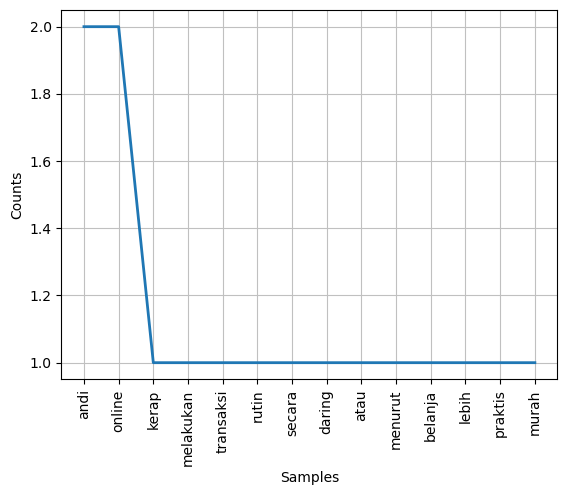

In [18]:
import matplotlib.pyplot as plt
kemunculan.plot(30,cumulative=False)
plt.show()

In [19]:
from nltk.tokenize import sent_tokenize
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."

tokens = nltk.tokenize.sent_tokenize(kalimat)
print(tokens)

['Andi kerap melakukan transaksi rutin secara daring atau online.', 'Menurut Andi belanja online lebih praktis & murah.']


### Stopwords

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

tokens = word_tokenize(kalimat)
listStopword =  set(stopwords.words('indonesian'))

removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)

print(removed)

['andi', 'kerap', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'praktis', 'murah']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alharidt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
stop = stopword.remove(kalimat)
tokens = nltk.tokenize.word_tokenize(stop)
print(tokens)

['andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'lebih', 'praktis', 'murah']


In [22]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
import string
import nltk

# Create a factory for the stopword remover
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Define your custom stopwords
custom_stopwords = ["andi"]

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."

# Remove punctuation and convert to lowercase
kalimat = kalimat.translate(str.maketrans('', '', string.punctuation)).lower()

# Apply Sastrawi stopword removal
stop = stopword.remove(kalimat)

# Tokenize the text
tokens = nltk.tokenize.word_tokenize(stop)

# Remove custom stopwords
tokens = [x for x in tokens if x not in custom_stopwords]

print(tokens)

['kerap', 'melakukan', 'transaksi', 'rutin', 'daring', 'online', 'belanja', 'online', 'lebih', 'praktis', 'murah']


###Stemmer

In [23]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

kata = ["program", "programs", "programer", "programing", "programers"]

for k in kata:
    print(k, " : ", ps.stem(k))


program  :  program
programs  :  program
programer  :  program
programing  :  program
programers  :  program


In [24]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
hasil = stemmer.stem(kalimat)
print(hasil)

andi kerap laku transaksi rutin cara daring atau online turut andi belanja online lebih praktis murah


In [29]:
filtered_df2 = filtered_df.head(200)
filtered_df2

,at,content,score,userName,contentp
0,2023-11-19 08:08:17,Paketnya mahal2 dan data internetnya juga boro...,1,Wildan Cell,paketnya mahal dan data internetnya juga boros...
1,2023-11-19 00:02:23,Ulasan lama : Parah ini kenapa ga bisa login d...,4,Deyubi kyubi,ulasan lama parah ini kenapa ga bisa login di ...
2,2023-11-18 22:02:21,Susah banget mau login ke aplikasi sampe jengkel,1,Asyraf Kaylani,susah banget mau login ke aplikasi sampe jengkel
3,2023-11-18 18:21:34,Cukup bagus tapi sayang tidak ada menu blokir ...,5,Ardi Ardian,cukup bagus tapi sayang tidak ada menu blokir ...
4,2023-11-18 17:02:54,"Kencang dan stabil tapi mahaaallll,.. dimurahi...",3,Bagas Eksanudin Aziz,kencang dan stabil tapi mahaaallll dimurahin d...
...,...,...,...,...,...
195,2023-10-31 16:03:41,"Susah terhubung, harus sering memasukkan passw...",2,Ikhwann z,susah terhubung harus sering memasukkan passwo...
196,2023-10-31 12:57:43,Sangat mendukung dan mudah di gunkan semoga ba...,5,Cherry Rayna,sangat mendukung dan mudah di gunkan semoga ba...
197,2023-10-31 12:40:41,mantap,4,April News,mantap
198,2023-10-31 10:26:07,klo lancar ya lancar cuma paket nya setiap bul...,1,beng beng Shorts,klo lancar ya lancar cuma paket nya setiap bul...


### Case with python with orbit data


In [30]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini',  'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

filtered_df2['contentp'] = filtered_df2['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
filtered_df2['contentp_clean'] = all_preproc(filtered_df2['contentp'])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alharidt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Alharidt\AppData\Local\Temp\ipykernel_9656\2703571932.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['contentp'] = filtered_df2['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 1543.10it/s]
C:\Users\Alharidt\AppData\Local\Temp\ipykernel_9656\2703571932.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['contentp_clean'] = all_preproc(filtered_df2['contentp'])


C:\Users\Alharidt\AppData\Local\Temp\ipykernel_9656\2692269471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['text_length'] = filtered_df2['contentp_clean'].apply(len)


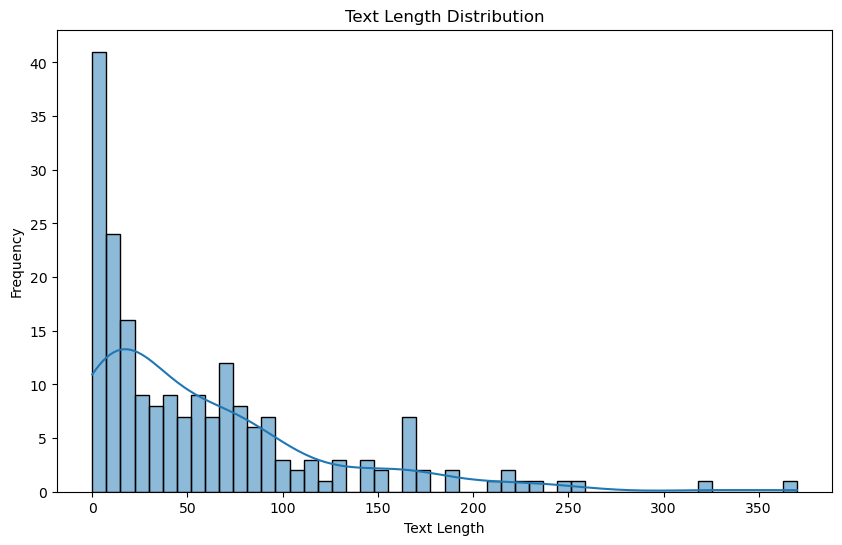

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

filtered_df2['text_length'] = filtered_df2['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df2, x='text_length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

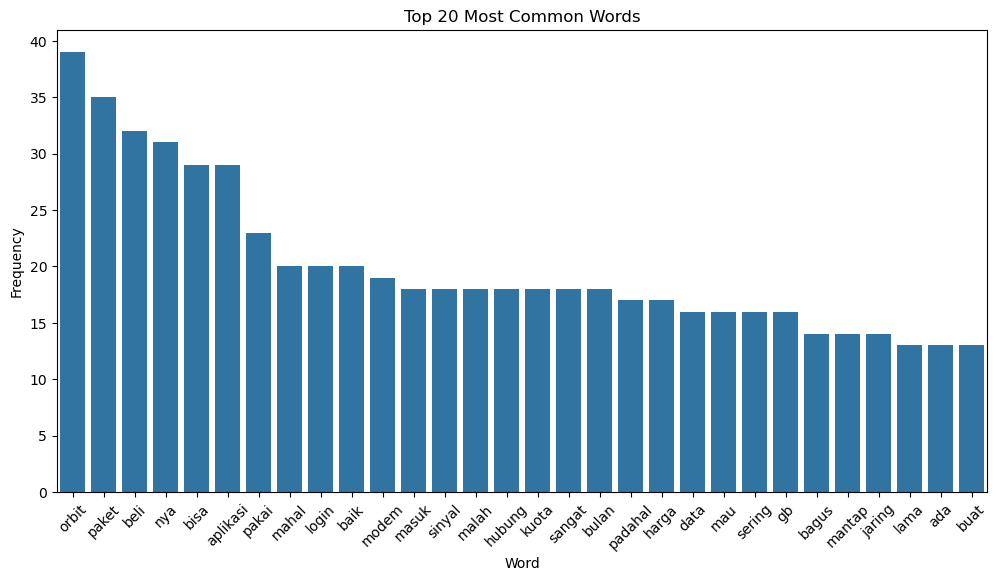

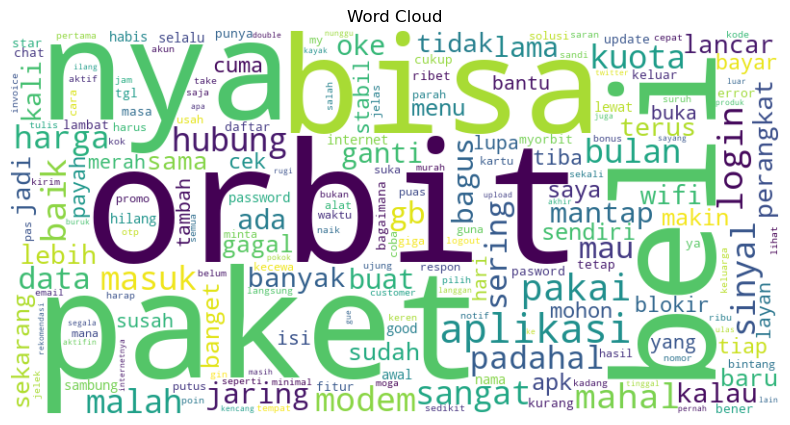

In [36]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(filtered_df2['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 20 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [37]:
filtered_df2

,at,content,score,userName,contentp,contentp_clean,text_length
0,2023-11-19 08:08:17,Paketnya mahal2 dan data internetnya juga boro...,1,Wildan Cell,paketnya mahal dan data internetnya juga boros...,paket mahal data internetnya boros pokok rekom...,72
1,2023-11-19 00:02:23,Ulasan lama : Parah ini kenapa ga bisa login d...,4,Deyubi kyubi,ulasan lama parah ini kenapa ga bisa login di ...,ulas lama parah kenapa bisa login aplikasi upd...,73
2,2023-11-18 22:02:21,Susah banget mau login ke aplikasi sampe jengkel,1,Asyraf Kaylani,susah banget mau login ke aplikasi sampe jengkel,susah banget mau login aplikasi jengkel,39
3,2023-11-18 18:21:34,Cukup bagus tapi sayang tidak ada menu blokir ...,5,Ardi Ardian,cukup bagus tapi sayang tidak ada menu blokir ...,cukup bagus sayang ada menu blokir buat lain m...,60
4,2023-11-18 17:02:54,"Kencang dan stabil tapi mahaaallll,.. dimurahi...",3,Bagas Eksanudin Aziz,kencang dan stabil tapi mahaaallll dimurahin d...,kencang stabil mahaaallll dimurahin sedikit ka...,70
...,...,...,...,...,...,...,...
195,2023-10-31 16:03:41,"Susah terhubung, harus sering memasukkan passw...",2,Ikhwann z,susah terhubung harus sering memasukkan passwo...,susah hubung sering masuk password wifi login ...,147
196,2023-10-31 12:57:43,Sangat mendukung dan mudah di gunkan semoga ba...,5,Cherry Rayna,sangat mendukung dan mudah di gunkan semoga ba...,sangat dukung mudah gun moga banyak promo kuot...,81
197,2023-10-31 12:40:41,mantap,4,April News,mantap,mantap,6
198,2023-10-31 10:26:07,klo lancar ya lancar cuma paket nya setiap bul...,1,beng beng Shorts,klo lancar ya lancar cuma paket nya setiap bul...,kalau lancar lancar cuma paket nya tiap bulan ...,171


In [ ]:
filtered_df2.to_csv('clean_review_all.csv', index=False)